In [6]:
!pip install piq

     |████████████████████████████████| 127 kB 1.4 MB/s            


In [12]:
!git clone https://github.com/aigagror/ML-Aesthetics-NIMA.git

Cloning into 'ML-Aesthetics-NIMA'...
remote: Enumerating objects: 423, done.
remote: Total 423 (delta 0), reused 0 (delta 0), pack-reused 423
Receiving objects: 100% (423/423), 55.90 MiB | 1.09 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [26]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Image
import os
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [28]:
!ls ../data2

Au_ani_0018-4.jpg  dfjksj-2.jpg     fsdfj-4.jpg      original-5.jpg
Au_ani_0021-4.jpg  dsdhgajdh-4.jpg  fshdjfh-1.jpg    sdfjkfh-5.jpg
Au_ani_0024-4.jpg  dsjkf-3.jpg	    hvjkvhdf-1.jpeg  sdhjkshd-2.jpg
Au_ani_0027-4.jpg  ewfhjkfhk-5.jpg  low-2.png	     sdjhf-3.jpg
Au_cha_0035-4.jpg  fhasjkfh-5.jpg   low-3.jpeg	     sgjhadg-1.png
dfjkdhfk-1.jpeg    fjsdkfjl-5.jpg   low-4.jpg	     sjdfkdf-1.avif
dfjkfjdl-1.jpeg    fksjdfh-2.jpg    lowsdasf-3.jpeg


In [4]:
"chdjfhkdj-5.jpg".split("-")

['chdjfhkdj', '5.jpg']

In [29]:
files = os.listdir("../data2")
img_with_quality = {}


for f in files:
    parts = f.split("-")
    if len(parts) > 1:
        q = parts[-1].split(".")[0]
        img_with_quality[f] = int(q)

In [30]:
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

In [31]:
img_with_quality

{'Au_ani_0021-4.jpg': 4,
 'fhasjkfh-5.jpg': 5,
 'original-5.jpg': 5,
 'Au_ani_0018-4.jpg': 4,
 'fshdjfh-1.jpg': 1,
 'sdhjkshd-2.jpg': 2,
 'low-3.jpeg': 3,
 'dfjksj-2.jpg': 2,
 'Au_cha_0035-4.jpg': 4,
 'Au_ani_0024-4.jpg': 4,
 'fksjdfh-2.jpg': 2,
 'fjsdkfjl-5.jpg': 5,
 'lowsdasf-3.jpeg': 3,
 'dfjkfjdl-1.jpeg': 1,
 'low-2.png': 2,
 'Au_ani_0027-4.jpg': 4,
 'ewfhjkfhk-5.jpg': 5,
 'fsdfj-4.jpg': 4,
 'dsdhgajdh-4.jpg': 4,
 'dsjkf-3.jpg': 3,
 'sgjhadg-1.png': 1,
 'sdjhf-3.jpg': 3,
 'low-4.jpg': 4,
 'sdfjkfh-5.jpg': 5,
 'sjdfkdf-1.avif': 1,
 'hvjkvhdf-1.jpeg': 1,
 'dfjkdhfk-1.jpeg': 1}

Human perception quality index: 4

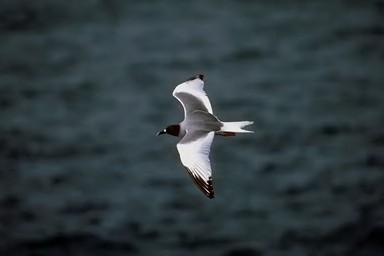

In [5]:
display(Image("data/Au_ani_0010-3.jpg"))

## Display

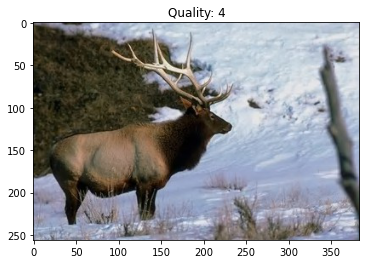

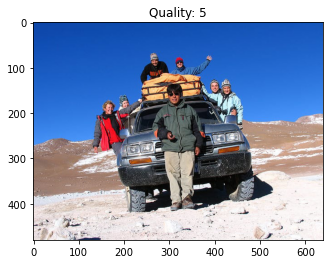

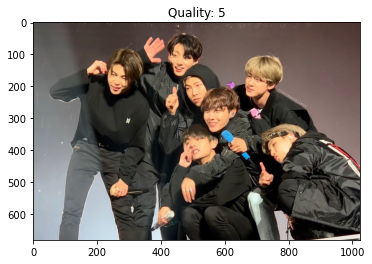

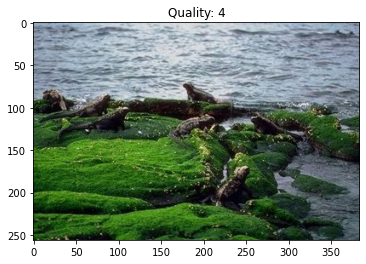

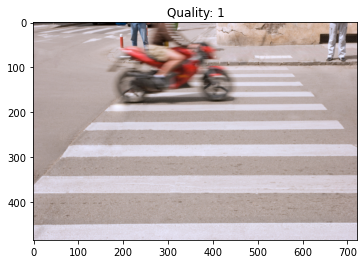

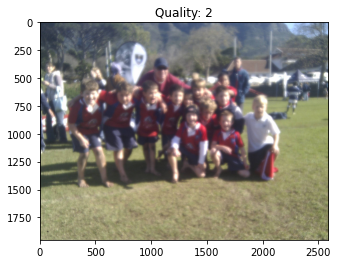

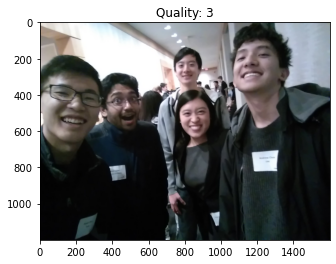

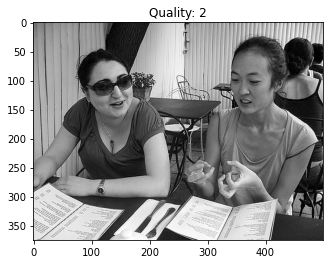

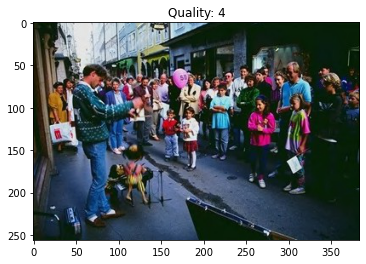

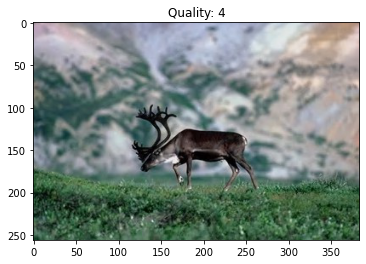

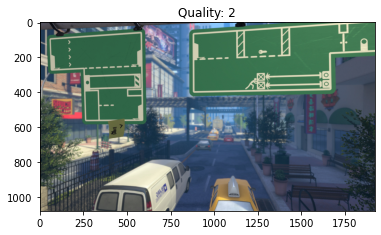

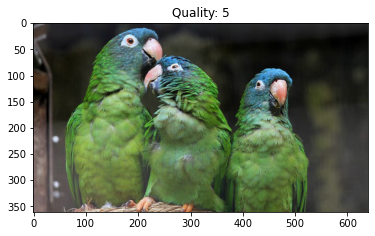

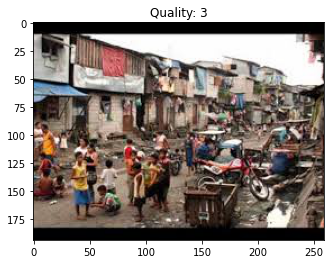

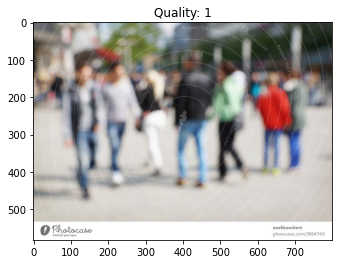

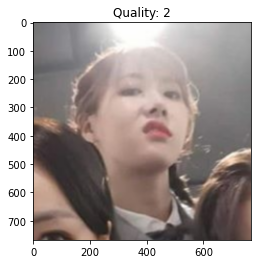

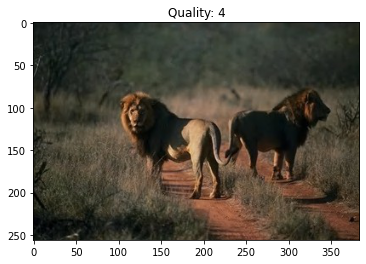

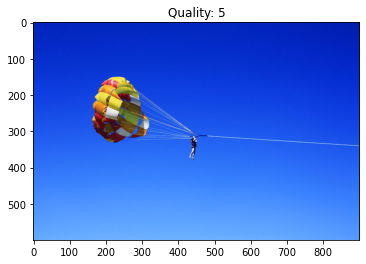

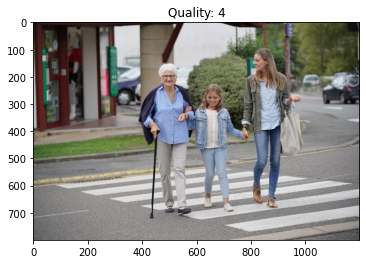

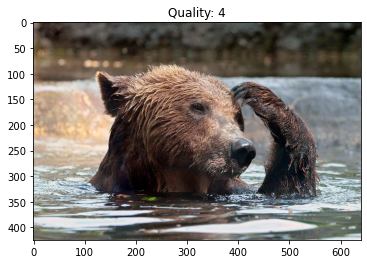

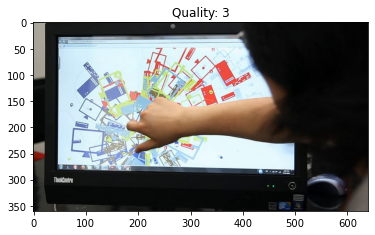

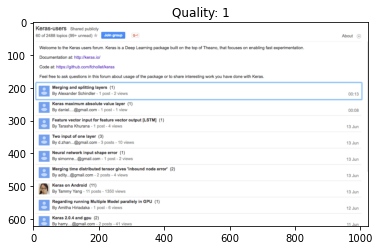

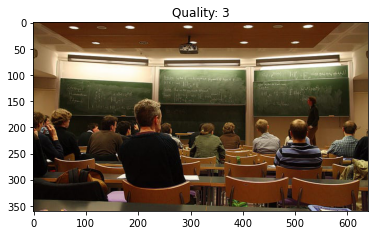

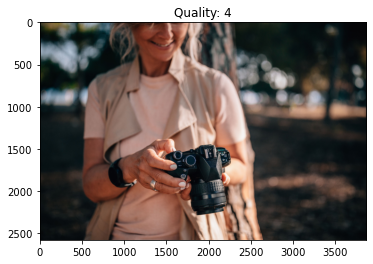

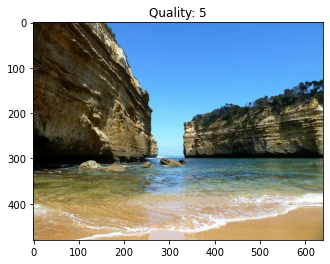

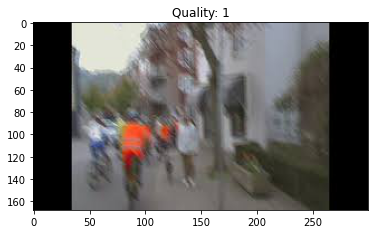

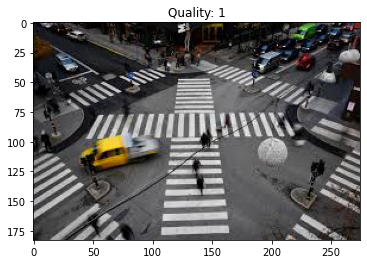

In [33]:
for k, v in img_with_quality.items():
    try:
        img = mpimg.imread("../data2/"+k)
    except:
        continue
    plt.title("Quality: {}".format(v))
    imgplot = plt.imshow(img)
    plt.show()

In [34]:
len(img_with_quality)

27

In [35]:
import torch
import piq
from skimage.io import imread

In [36]:
%cd ML-Aesthetics-NIMA

[Errno 2] No such file or directory: 'ML-Aesthetics-NIMA'
/home/shan/Documents/ITMO/SEMESTER_3/SMLT/Task4/ML-Aesthetics-NIMA


In [37]:
from main import rate

In [38]:
def get_NR_metrics(path, human_percept):
    
    x = torch.tensor(imread(path)).permute(2, 0, 1)[None, ...] / 255.
    # To compute BRISQUE score as a measure, use lower case function from the library
    brisque_index: torch.Tensor = piq.brisque(x, data_range=1., reduction='none')
    # In order to use BRISQUE as a loss function, use corresponding PyTorch module.
    # Note: the back propagation is not available using torch==1.5.0.
    # Update the environment with latest torch and torchvision.
    brisque_loss: torch.Tensor = piq.BRISQUELoss(data_range=1., reduction='none')(x)
#     print(f"BRISQUE index: {brisque_index.item():0.4f}")
    
    # To compute TV as a measure, use lower case function from the library:
    tv_index: torch.Tensor = piq.total_variation(x)
    # In order to use TV as a loss function, use corresponding PyTorch module:
    tv_loss: torch.Tensor = piq.TVLoss(reduction='none')(x)
#     print(f"TV index: {tv_index.item():0.4f}")
    
    scores, mean, std = rate(path)
    score = mean
#     print("scores:", scores)
#     score = np.argmax(scores) + 1
#     print("NIMA index: {}/10".format(score))
    
    metrics = {"image_name":path.split("/")[-1],
               "human_perception":human_percept,
               "TV": tv_index.item(),
               "BRISQUE":brisque_index.item(),
               "NIMA_mean": mean,
               "NIMA_std": std}
    return metrics
#     cmd = "python ML-Aesthetics-NIMA/main.py {}".format(path)
#     os.system(cmd)

In [39]:
!pwd

/home/shan/Documents/ITMO/SEMESTER_3/SMLT/Task4/ML-Aesthetics-NIMA


In [40]:
list_of_dict = []

{'image_name': 'Au_ani_0021-4.jpg', 'human_perception': 4, 'TV': 39.4543571472168, 'BRISQUE': 39.74481201171875, 'NIMA_mean': 5.424366474151611, 'NIMA_std': 1.4706037044525146}


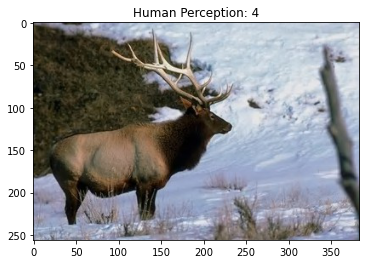

{'image_name': 'fhasjkfh-5.jpg', 'human_perception': 5, 'TV': 127.60291290283203, 'BRISQUE': 78.67596435546875, 'NIMA_mean': 5.421694755554199, 'NIMA_std': 1.408454418182373}


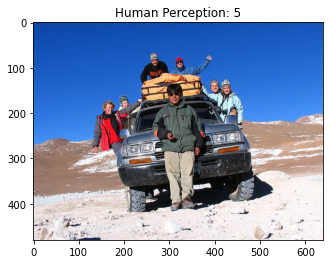

{'image_name': 'original-5.jpg', 'human_perception': 5, 'TV': 86.43932342529297, 'BRISQUE': 29.20281982421875, 'NIMA_mean': 5.433191776275635, 'NIMA_std': 1.4742743968963623}


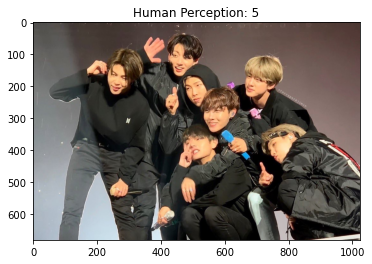

{'image_name': 'Au_ani_0018-4.jpg', 'human_perception': 4, 'TV': 62.30595779418945, 'BRISQUE': 39.65252685546875, 'NIMA_mean': 5.404819011688232, 'NIMA_std': 1.4139444828033447}


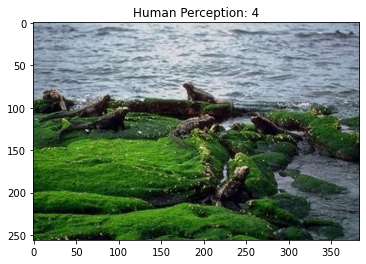

{'image_name': 'fshdjfh-1.jpg', 'human_perception': 1, 'TV': 48.481685638427734, 'BRISQUE': 33.77996826171875, 'NIMA_mean': 5.407967567443848, 'NIMA_std': 1.483436942100525}


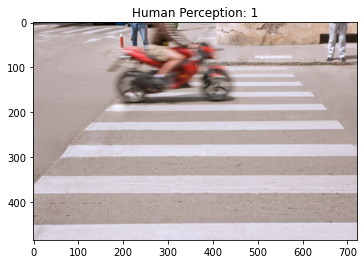

{'image_name': 'sdhjkshd-2.jpg', 'human_perception': 2, 'TV': 53.75447082519531, 'BRISQUE': 47.22186279296875, 'NIMA_mean': 5.418705463409424, 'NIMA_std': 1.4144078493118286}


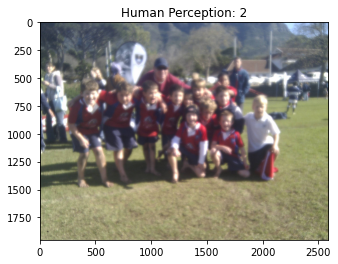

{'image_name': 'low-3.jpeg', 'human_perception': 3, 'TV': 54.28224563598633, 'BRISQUE': 62.66864013671875, 'NIMA_mean': 5.402101039886475, 'NIMA_std': 1.4167510271072388}


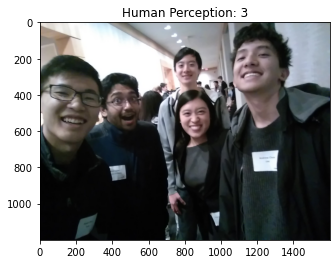

{'image_name': 'dfjksj-2.jpg', 'human_perception': 2, 'TV': 119.42692565917969, 'BRISQUE': 79.53143310546875, 'NIMA_mean': 5.414831161499023, 'NIMA_std': 1.4150846004486084}


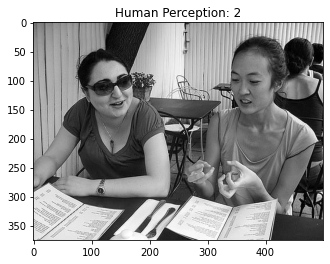

{'image_name': 'Au_cha_0035-4.jpg', 'human_perception': 4, 'TV': 73.27043151855469, 'BRISQUE': 58.53192138671875, 'NIMA_mean': 5.421909809112549, 'NIMA_std': 1.4099204540252686}


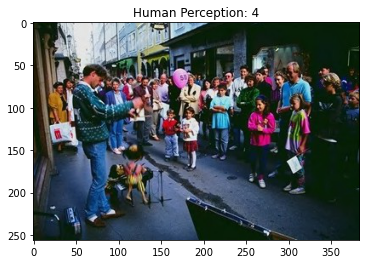

{'image_name': 'Au_ani_0024-4.jpg', 'human_perception': 4, 'TV': 36.21527862548828, 'BRISQUE': 54.18963623046875, 'NIMA_mean': 5.426747798919678, 'NIMA_std': 1.436261773109436}


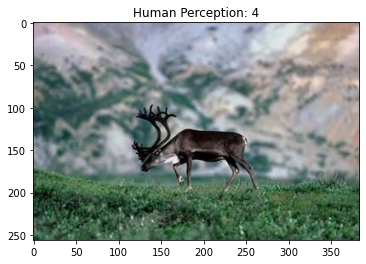

{'image_name': 'fksjdfh-2.jpg', 'human_perception': 2, 'TV': 108.40315246582031, 'BRISQUE': 48.12957763671875, 'NIMA_mean': 5.388991355895996, 'NIMA_std': 1.4245737791061401}


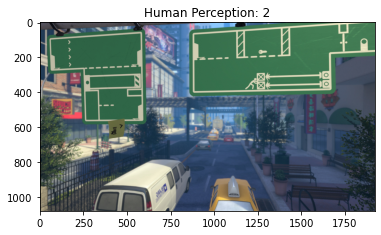

{'image_name': 'fjsdkfjl-5.jpg', 'human_perception': 5, 'TV': 52.27143859863281, 'BRISQUE': 37.17645263671875, 'NIMA_mean': 5.397268772125244, 'NIMA_std': 1.409545660018921}


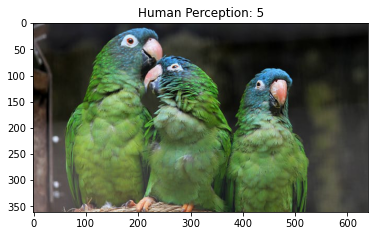

{'image_name': 'lowsdasf-3.jpeg', 'human_perception': 3, 'TV': 64.47616577148438, 'BRISQUE': 55.45672607421875, 'NIMA_mean': 5.400636672973633, 'NIMA_std': 1.4170050621032715}


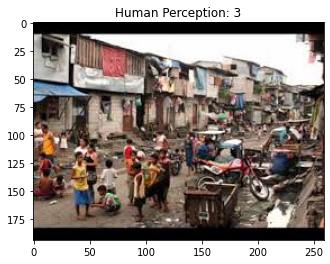

{'image_name': 'dfjkfjdl-1.jpeg', 'human_perception': 1, 'TV': 52.889278411865234, 'BRISQUE': 62.77801513671875, 'NIMA_mean': 5.403415203094482, 'NIMA_std': 1.4780324697494507}


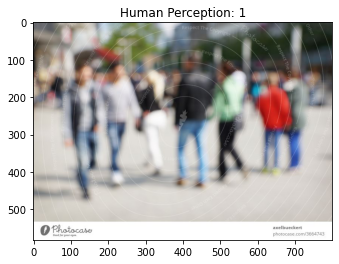

ignoring:  ../data2/low-2.png
{'image_name': 'Au_ani_0027-4.jpg', 'human_perception': 4, 'TV': 32.485042572021484, 'BRISQUE': 54.04510498046875, 'NIMA_mean': 5.436154842376709, 'NIMA_std': 1.4605283737182617}


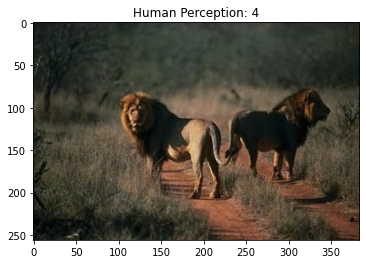

{'image_name': 'ewfhjkfhk-5.jpg', 'human_perception': 5, 'TV': 43.656219482421875, 'BRISQUE': 56.49578857421875, 'NIMA_mean': 5.4401469230651855, 'NIMA_std': 1.506552815437317}


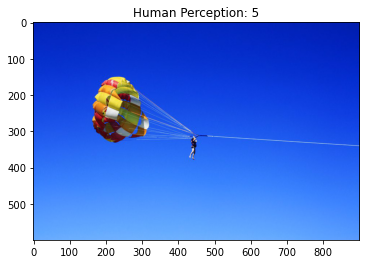

{'image_name': 'fsdfj-4.jpg', 'human_perception': 4, 'TV': 103.0673828125, 'BRISQUE': 45.74676513671875, 'NIMA_mean': 5.423941612243652, 'NIMA_std': 1.4726117849349976}


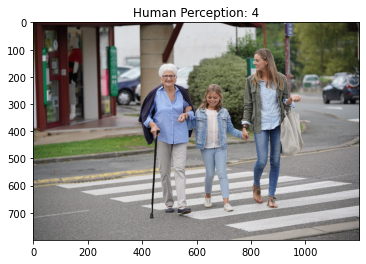

{'image_name': 'dsdhgajdh-4.jpg', 'human_perception': 4, 'TV': 105.19593811035156, 'BRISQUE': 72.15594482421875, 'NIMA_mean': 5.420529842376709, 'NIMA_std': 1.415663719177246}


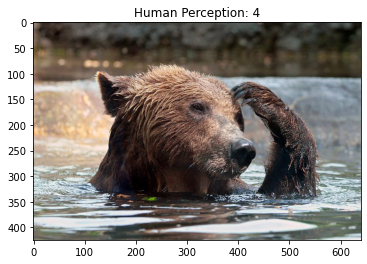

{'image_name': 'dsjkf-3.jpg', 'human_perception': 3, 'TV': 76.09972381591797, 'BRISQUE': 59.19403076171875, 'NIMA_mean': 5.416716575622559, 'NIMA_std': 1.426518440246582}


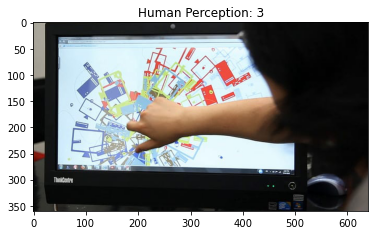

ignoring:  ../data2/sgjhadg-1.png
{'image_name': 'sdjhf-3.jpg', 'human_perception': 3, 'TV': 95.59457397460938, 'BRISQUE': 52.85467529296875, 'NIMA_mean': 5.413530349731445, 'NIMA_std': 1.4184621572494507}


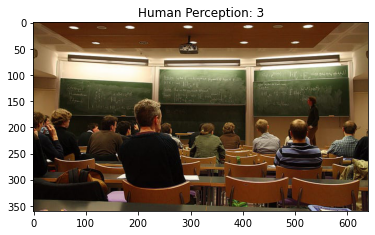

{'image_name': 'low-4.jpg', 'human_perception': 4, 'TV': 105.37750244140625, 'BRISQUE': 39.13836669921875, 'NIMA_mean': 5.404091835021973, 'NIMA_std': 1.411543846130371}


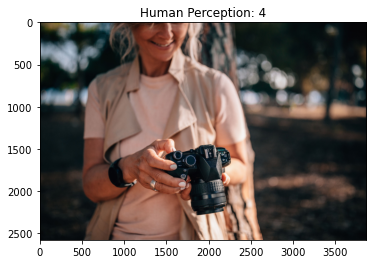

{'image_name': 'sdfjkfh-5.jpg', 'human_perception': 5, 'TV': 107.11511993408203, 'BRISQUE': 71.08709716796875, 'NIMA_mean': 5.421688079833984, 'NIMA_std': 1.4154272079467773}


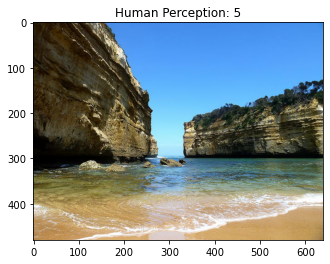

ignoring:  ../data2/sjdfkdf-1.avif
{'image_name': 'hvjkvhdf-1.jpeg', 'human_perception': 1, 'TV': 18.846019744873047, 'BRISQUE': 16.61981201171875, 'NIMA_mean': 5.405057430267334, 'NIMA_std': 1.415250301361084}


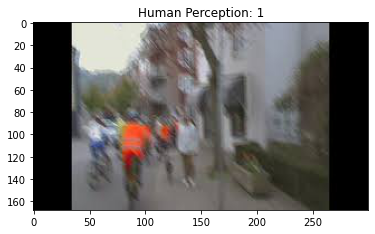

{'image_name': 'dfjkdhfk-1.jpeg', 'human_perception': 1, 'TV': 65.19139862060547, 'BRISQUE': 64.79315185546875, 'NIMA_mean': 5.4401445388793945, 'NIMA_std': 1.492226481437683}


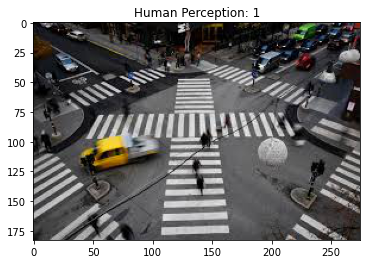

In [41]:
ignored = 0
for k, v in img_with_quality.items():
    path = "../data2/"+k
#     print("path:", path)
#     get_NR_metrics(path)
    try:
        d = get_NR_metrics(path, v)
        list_of_dict.append(d)
        print(d)
    except:
        print("ignoring: ", path)
        ignored += 1
        continue
    img = mpimg.imread(path)
    plt.title("Human Perception: {}".format(v))
    imgplot = plt.imshow(img)
    plt.show()

In [42]:
import pandas as pd
metrics_df = pd.DataFrame(list_of_dict)

In [43]:
metrics_df

image_name  human_perception          TV    BRISQUE  NIMA_mean  \
0   Au_ani_0021-4.jpg                 4   39.454357  39.744812   5.424366   
1      fhasjkfh-5.jpg                 5  127.602913  78.675964   5.421695   
2      original-5.jpg                 5   86.439323  29.202820   5.433192   
3   Au_ani_0018-4.jpg                 4   62.305958  39.652527   5.404819   
4       fshdjfh-1.jpg                 1   48.481686  33.779968   5.407968   
5      sdhjkshd-2.jpg                 2   53.754471  47.221863   5.418705   
6          low-3.jpeg                 3   54.282246  62.668640   5.402101   
7        dfjksj-2.jpg                 2  119.426926  79.531433   5.414831   
8   Au_cha_0035-4.jpg                 4   73.270432  58.531921   5.421910   
9   Au_ani_0024-4.jpg                 4   36.215279  54.189636   5.426748   
10      fksjdfh-2.jpg                 2  108.403152  48.129578   5.388991   
11     fjsdkfjl-5.jpg                 5   52.271439  37.176453   5.397269   
12    lowsdasf-3.jpeg                 3   64.476166  55.456726   5.400637   
13    dfjkfjdl-1.jpeg                 1   52.889278  62.778015   5.403415   
14  Au_ani_0027-4.jpg                 4   32.485043  54.045105   5.436155   
15    ewfhjkfhk-5.jpg                 5   43.656219  56.495789   5.440147   
16        fsdfj-4.jpg                 4  103.067383  45.746765   5.423942   
17    dsdhgajdh-4.jpg                 4  105.195938  72.155945   5.420530   
18        dsjkf-3.jpg                 3   76.099724  59.194031   5.416717   
19        sdjhf-3.jpg                 3   95.594574  52.854675   5.413530   
20          low-4.jpg                 4  105.377502  39.138367   5.404092   
21      sdfjkfh-5.jpg                 5  107.115120  71.087097   5.421688   
22    hvjkvhdf-1.jpeg                 1   18.846020  16.619812   5.405057   
23    dfjkdhfk-1.jpeg                 1   65.191399  64.793152   5.440145   

    NIMA_std  
0   1.470604  
1   1.408454  
2   1.474274  
3   1.413944  
4   1.483437  
5   1.414408  
6   1.416751  
7   1.415085  
8   1.409920  
9   1.436262  
10  1.424574  
11  1.409546  
12  1.417005  
13  1.478032  
14  1.460528  
15  1.506553  
16  1.472612  
17  1.415664  
18  1.426518  
19  1.418462  
20  1.411544  
21  1.415427  
22  1.415250  
23  1.492226

In [45]:
metrics_df.corr()

human_perception        TV   BRISQUE  NIMA_mean  NIMA_std
human_perception          1.000000  0.237764  0.100319   0.319209 -0.133688
TV                        0.237764  1.000000  0.499555  -0.084881 -0.340978
BRISQUE                   0.100319  0.499555  1.000000   0.232622 -0.143587
NIMA_mean                 0.319209 -0.084881  0.232622   1.000000  0.543548
NIMA_std                 -0.133688 -0.340978 -0.143587   0.543548  1.000000

### Result:

According to pearson correlation, NIMA_mean has more correlation with human perception than any other metric